# Importando base de dados

In [98]:
import pandas as pd  # importando o Pandas
df = pd.read_csv('tips.csv')  # criando o dataframe inicial a partir do arquivo tips.csv
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução dos campos e colunas

## Tradução das colunas

In [99]:
df.columns  # retorna os nomes das colunas do DF

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [100]:
renomear = { 
    'total_bill': 'conta_total',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'horário',
    'size': 'pessoas_na_mesa'
}  # dicionário com os nomes das colunas e suas traduções:
dft = df.rename(columns=renomear)  # renomeando as colunas de acordo com a variável acima
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


## Tradução dos campos

In [101]:
dft.horário.unique()  # verificando os valores únicos na coluna 'horário'

array(['Dinner', 'Lunch'], dtype=object)

In [102]:
# colunas 'sobremesa', 'dia_da_semana' e 'horário':
dft['sobremesa'] = dft['sobremesa'].map({'No': 'Não', 'Yes': 'Sim'})
dft['dia_da_semana'] = dft['dia_da_semana'].map({'Sun': 'Domingo', 
                                                 'Sat': 'Sábado',
                                                 'Thur': 'Quinta',
                                                 'Fri': 'Sexta',})
dft['horário'] = dft['horário'].map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Iniciando com Seaborn

In [106]:
# importando:
import seaborn as sns  
# verificando qual a versão:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\luigy\anaconda3\lib\site-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: 


# Análise 1: valor da conta e gorjeta

#### Relembrando colunas:

In [104]:
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Plotando gráfico de dispersão

<AxesSubplot:xlabel='conta_total', ylabel='gorjeta'>

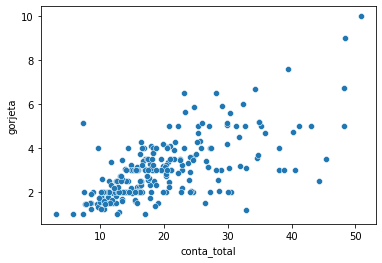

In [105]:
sns.scatterplot(x='conta_total', y='gorjeta', data=dft)

In [107]:
#mostrando o tamanho do DF (linhas/colunas):
dft.shape

(244, 6)

## Criando o campo porcentagem

In [109]:
# relembrando como está o DF
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [111]:
dft['porcentagem'] = (dft['gorjeta'] / dft['conta_total']).round(2)
dft

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


<AxesSubplot:xlabel='conta_total', ylabel='porcentagem'>

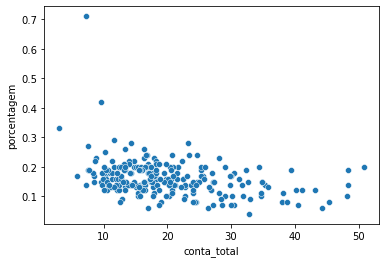

In [113]:
# scatterplot agora com o campo novo 'porcentagem'
sns.scatterplot(x='conta_total', y='porcentagem', data=dft)

## Plotando gráfico linha (relplot)

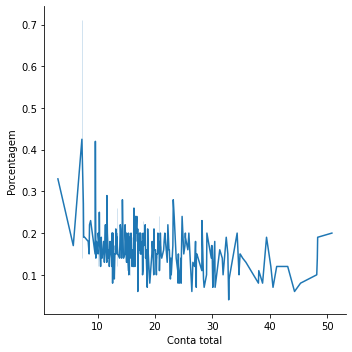

In [116]:
teste_rel = sns.relplot(x='conta_total', y='porcentagem', data=dft, kind='line')
teste_rel.set(xlabel='Conta total', ylabel='Porcentagem')  # renomeando as labels

# Análise 2: sobremesa

## Análise descritiva:

Analisando se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

In [24]:
dft.head()  # relembrando

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [117]:
dft.describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160943
std,8.902412,1.383638,0.951100,0.061030
min,3.070000,1.000000,1.000000,0.040000
25%,13.347500,2.000000,2.000000,0.130000
50%,17.795000,2.900000,2.000000,0.155000
75%,24.127500,3.562500,3.000000,0.190000
max,50.810000,10.000000,6.000000,0.710000


In [27]:
dft[dft['sobremesa'] == 'Sim'].describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [28]:
dft[dft['sobremesa'] == 'Não'].describe()

,conta_total,gorjeta,pessoas_na_mesa,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


## Análise visual:

Analisando com gráficos se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

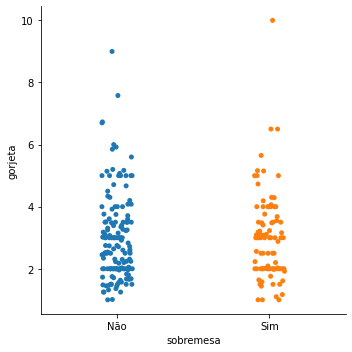

In [29]:
sns.catplot(x='sobremesa', y='gorjeta', data=dft)

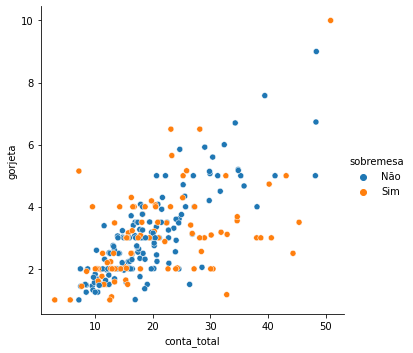

In [30]:
sns.relplot(x='conta_total', y='gorjeta', hue='sobremesa', data=dft)

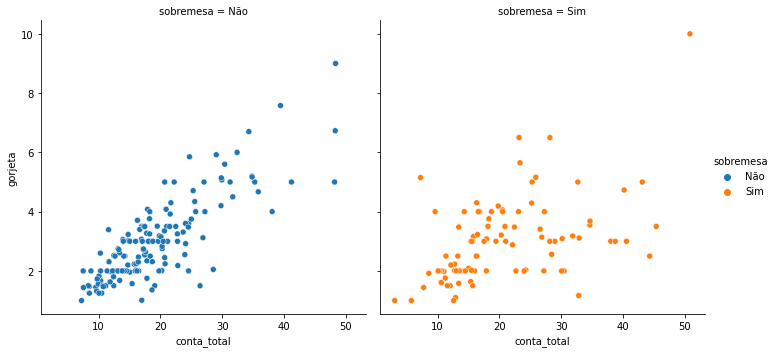

In [31]:
sns.relplot(x='conta_total', y='gorjeta', hue='sobremesa', col='sobremesa', data=dft)

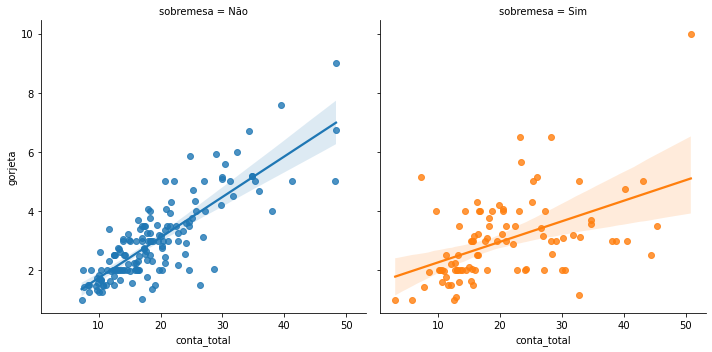

In [32]:
sns.lmplot(x='conta_total', y='gorjeta', col='sobremesa', hue='sobremesa', data=dft)

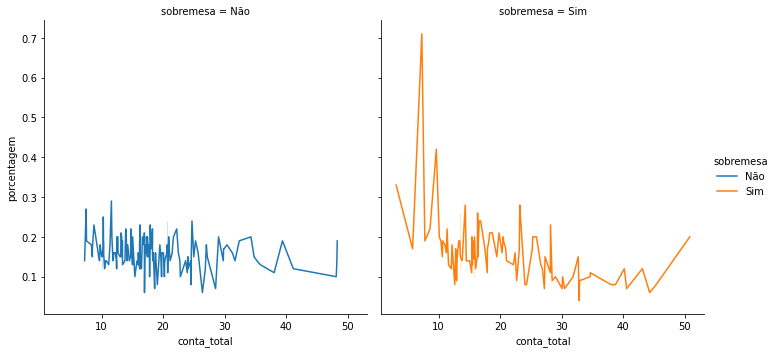

In [33]:
sns.relplot(x='conta_total', y='porcentagem', hue='sobremesa', kind='line', col='sobremesa', data=dft)

## Teste de hipótese

Analisando com o ranksums se o valor da gorjeta está ligado ao fato de ter sobremesa ou não

Hipótese null: A distribuição da taxa da gorjeta é a mesma nos dois grupos

Hipótese alt: A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos

In [118]:
# importando o ranksums (estatística)
from scipy.stats import ranksums

In [123]:
# query que retorna a coluna porcentagem, mas apenas se "sobremesa == 'Sim'"
sobremesa = dft.query("sobremesa == 'Sim'").porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [124]:
# query que retorna a coluna porcentagem, mas apenas se "sobremesa == 'Não'"
sem_sobremesa = dft.query("sobremesa == 'Não'")['porcentagem']
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [125]:
rs_sobremesa = ranksums(sobremesa, sem_sobremesa)[1]
print(f'O pvalue é {rs_sobremesa}')

O pvalue é 0.5266635660124415


pvalue = 0,52, o que significa que pvalue > 0,05, ou seja, NÃO podemos aceitar a H alt

# Análise 3: dias da semana

In [126]:
dft.head()  #relembrando

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


## Análise visual

Analisando com gráficos se o valor da gorjeta está ligado ao dia da semana

In [39]:
dft.dia_da_semana.unique()
#mostrando os valores únicos na coluna dia_da_semana^

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

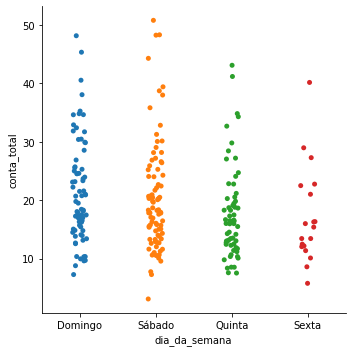

In [40]:
sns.catplot(x='dia_da_semana', y='conta_total', data=dft)

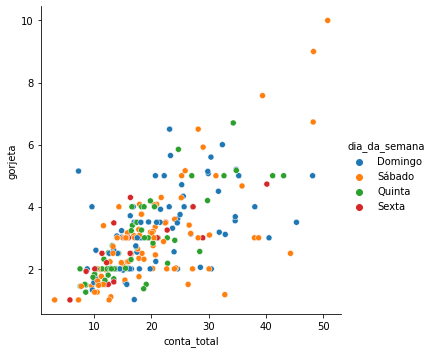

In [41]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia_da_semana', data=dft)

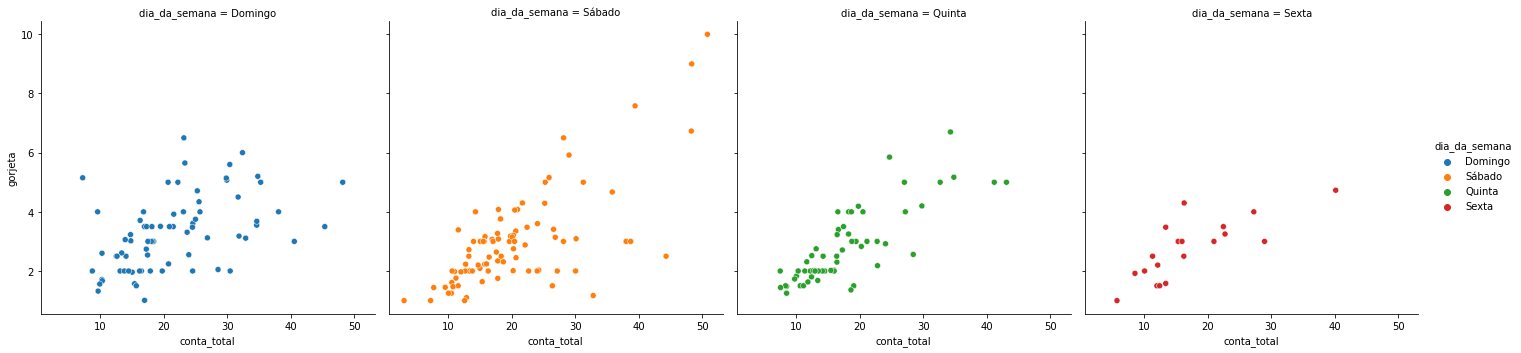

In [42]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=dft)

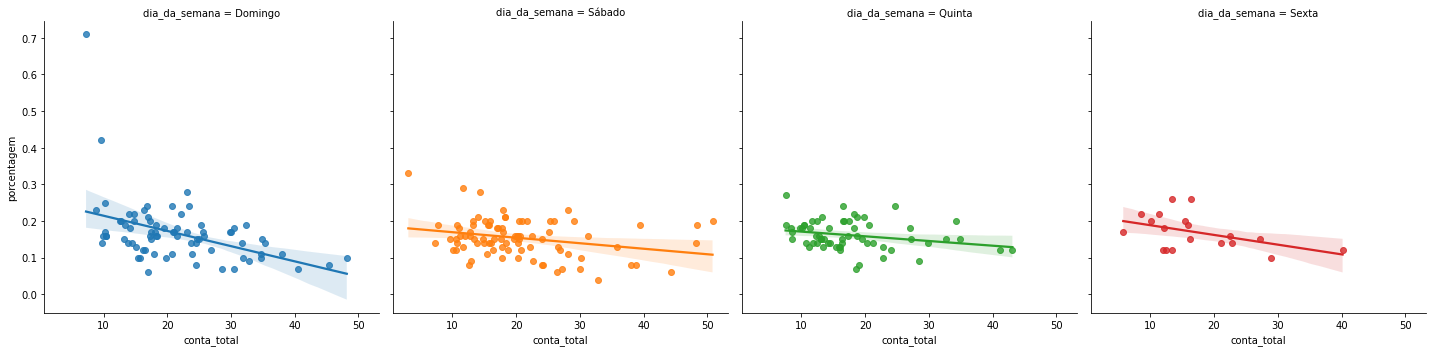

In [128]:
sns.lmplot(x='conta_total', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dft)

Podemos ver que, quanto maior o valor da conta, menor a porcentagem da gorjeta

## Análise descritiva:

Analisando se o valor da gorjeta está ligado ao dia da semana

In [138]:
media_geral_gorjetas = dft.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas:.3f}')

A média geral das gorjetas é de 2.998


In [45]:
#mostrando a média de cada dia da semana:
dft.groupby('dia_da_semana').mean().round(2)[['conta_total', 'gorjeta', 'porcentagem']]

,conta_total,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


In [46]:
#mostrando a frequência de cada dia:
print('Frequência dos dias:')
dft.dia_da_semana.value_counts()

Frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

Analisando com o ranksums se o valor da gorjeta está ligado ao dia da semana

hipótese nula: a distribuição do valor da conta é igual no sábado e no domingo

hipótese alt: a distribuição do valor da conta NÃO é igual no sábado e no domingo

In [48]:
# query que retorna a coluna 'conta_total', mas apenas se "dia_da_semana == 'Domingo'"
conta_domingo = dft.query("dia_da_semana == 'Domingo'").conta_total
conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: conta_total, Length: 76, dtype: float64

In [140]:
# query que retorna a coluna 'conta_total', mas apenas se "dia_da_semana == 'Sábado'"
conta_sabado = dft.query("dia_da_semana == 'Sábado'").conta_total
conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: conta_total, Length: 87, dtype: float64

In [144]:
rs_dia_da_semana = ranksums(conta_sabado, conta_domingo)[1]
print(f'O pvalue é {rs_dia_da_semana}')

O pvalue é 0.3576728477868443


pvalue = 0,35, o que significa que pvalue > 0,05, ou seja, NÃO podemos aceitar a H alt

# Análise 4: horário 

Analisando a hora do dia, se tem diferença quando é jantar ou almoço em relação à gorjeta.

## Análise descritiva e visual

In [145]:
#relembrando
dft.head()

,conta_total,gorjeta,sobremesa,dia_da_semana,horário,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [146]:
dft['horário'].unique()  # mostra os dados únicos da coluna 'horario'

array(['Jantar', 'Almoço'], dtype=object)

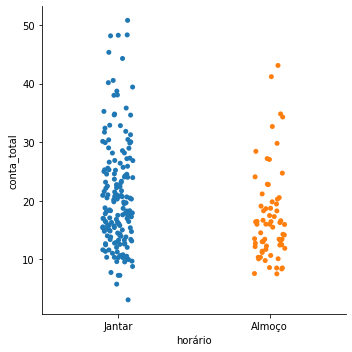

In [53]:
sns.catplot(x='horário', y='conta_total', data=dft)

aparentementme o valor da conta no jantar é maior que no almoço

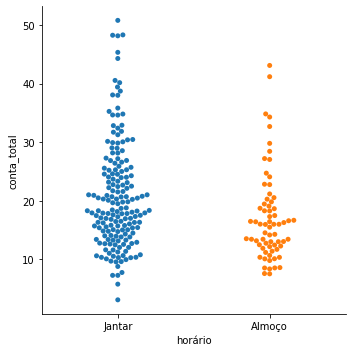

In [54]:
sns.catplot(x='horário', y='conta_total', kind='swarm', data=dft)

esse tipo dá uma espalhada

<AxesSubplot:xlabel='horário', ylabel='conta_total'>

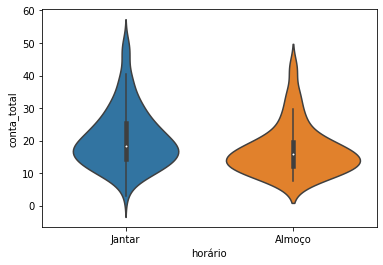

In [55]:
sns.violinplot(x='horário', y='conta_total', data=dft)

<AxesSubplot:xlabel='horário', ylabel='conta_total'>

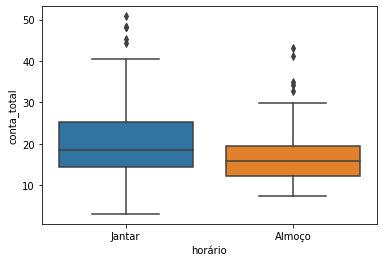

In [56]:
sns.boxplot(x='horário', y='conta_total', data=dft)

### Queries:

In [57]:
almoço = dft.query("horário == 'Almoço'")['conta_total']
almoço
#query dos itens horário == almoço

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: conta_total, Length: 68, dtype: float64

In [58]:
jantar = dft.query("horário == 'Jantar'")['conta_total']
jantar
#query dos itens horário == jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: conta_total, Length: 176, dtype: float64

#### Gráficos das queries:

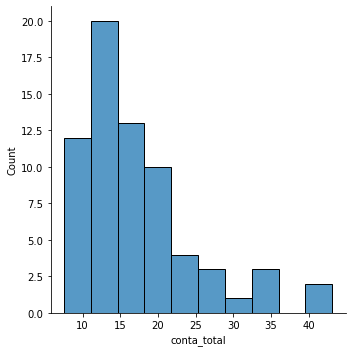

In [59]:
sns.displot(almoço)

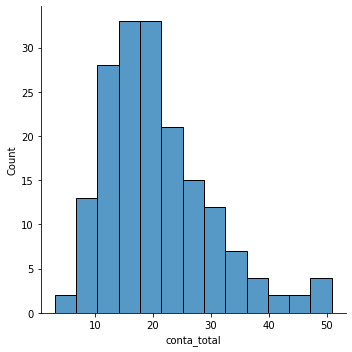

In [60]:
sns.displot(jantar)

## Testes de hipótese

### Teste de hipótese 1: horário

In [71]:
dft.groupby('horário').mean().round(2)[['conta_total', 'gorjeta', 'porcentagem']]
# retorna a média da conta, gorjeta e porcentagem dos grupos (groupby) Almoço e Jantar

,conta_total,gorjeta,porcentagem
horário,,,
Almoço,17.17,2.73,0.16
Jantar,20.80,3.10,0.16


Teste de hipótese: verificar se há diferença entre o valor da conta no jantar e almoço

Hipótese nula: a distribuição do valor da conta é igual no jantar e no almoço

Hipótese alt: a distribuição do valor da conta NÃO é igual no jantar e no almoço

In [83]:
rs_jantar_almoço = ranksums(jantar, almoço)[1]
print(f'O pvalue é {rs_jantar_almoço}')

O pvalue é 0.0011791039723641672


pvalue = 0,001, o que significa que pvalue < 0,05, ou seja, podemos SIM aceitar a H alt

### Teste de hipótese 2: porcentagem do horário

Teste de hipótese: verificar se há diferença entre a porcentagem da gorjeta no jantar e almoço

Hipótese nula: a distribuição da taxa da gorjeta é igual no jantar e no almoço

Hipótese alt: a distribuição da taxa da gorjeta NÃO é igual no jantar e no almoço

#### Queries:

In [79]:
porcentagem_almoço = dft.query("horário == 'Almoço'")['porcentagem']

In [80]:
porcentagem_jantar = dft.query("horário == 'Jantar'")['porcentagem']

In [84]:
rs_pcent_jantar_almoço = ranksums(porcentagem_almoço, porcentagem_jantar)[1]
print(f'O pvalue é {rs_pcent_jantar_almoço}')

O pvalue é 0.2602493995587126


pvalue = 0,26, o que significa que pvalue > 0,05, ou seja, NÃO podemos aceitar a H alt